<font face="微软雅黑" size=5 color=#A52A2A > Lesson 12 SciPy插值与拟合

In [1]:
## 画图必备
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 插值问题 interpolation
+ 分段线性插值
+ 样条曲线插值
+ 拉格朗日多项式插值

### 样条曲线插值

(array([0.        , 0.        , 0.        , 0.        , 1.57079633,
       2.35619449, 3.14159265, 3.92699082, 4.71238898, 6.28318531,
       6.28318531, 6.28318531, 6.28318531]), array([ 3.44265545e-18,  5.54608516e-01,  1.21921009e+00,  7.83113675e-01,
        2.45205789e-16, -7.83113675e-01, -1.21921009e+00, -5.54608516e-01,
       -2.44929360e-16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00]), 3)


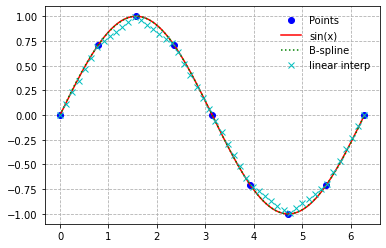

In [8]:
from scipy import interpolate
x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
y = np.sin(x)
tck = interpolate.splrep(x, y, k=3) # 返回b样条曲线的表达式, k为阶数（一般取 1 <= k <= 5）
print(tck)
xnew = np.linspace(0, 2*np.pi, 200)
xvals = np.linspace(0, 2*np.pi, 50)
y_bsp = interpolate.splev(xnew, tck) #样条曲线插值，直接返回插值点的y值
y_interp = np.interp(xvals, x, y) #numpy实现线性插值，直接返回插值点的y值
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'bo', label='Points')
ax.plot(xnew, np.sin(xnew), 'r-', label='sin(x)')
ax.plot(xnew, y_bsp, 'g:', label='B-spline')
ax.plot(xvals, y_interp, 'cx', label='linear interp')
ax.legend(loc='best', frameon=False)
ax.grid(linestyle="--")
plt.show()

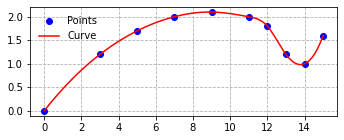

In [13]:
from scipy import interpolate
x = np.array([0, 3, 5, 7, 9, 11, 12, 13, 14, 15])
y = np.array([0, 1.2, 1.7, 2.0, 2.1, 2.0, 1.8, 1.2, 1.0, 1.6])
xnew = np.linspace(0, 15, 150)
tck = interpolate.splrep(x, y, k=3)
yinterp = interpolate.splev(xnew, tck)
fig, ax = plt.subplots(1, 1, figsize=(5.5, 2))
ax.plot(x, y, 'bo', label='Points')
ax.plot(xnew, yinterp, 'r-', label='Curve')
ax.legend(loc='best', frameon=False)
ax.grid(linestyle="--")
plt.show()

### 拉格朗日多项式插值

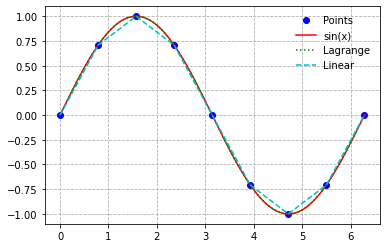

In [12]:
from scipy import interpolate
x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
y = np.sin(x)
p1 = interpolate.lagrange(x,y) #拉格朗日多项式插值，返回插值函数
p2 = interpolate.interp1d(x,y) #分段线性插值，返回插值函数
xnew = np.linspace(0, 2*np.pi, 200)
y_lagrange = p1(xnew)
y_linear = p2(xnew)

fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'bo', label='Points')
ax.plot(xnew, np.sin(xnew), 'r-', label='sin(x)')
ax.plot(xnew, y_lagrange, 'g:', label='Lagrange')
ax.plot(xnew, y_linear, 'c--', label='Linear')

ax.legend(loc='best', frameon=False)
ax.grid(linestyle="--")
plt.show()

### 练习：

+ 为前面的飞机机翼轮廓数据做分段线性插值和拉格朗日插值 

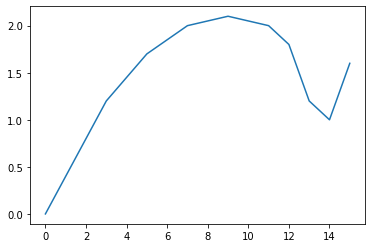

In [43]:
x = np.array([0, 3, 5, 7, 9, 11, 12, 13, 14, 15])
y = np.array([0, 1.2, 1.7, 2.0, 2.1, 2.0, 1.8, 1.2, 1.0, 1.6])
xnew = np.linspace(0, 15, 150)
fig, ax = plt.subplots(1, 1)
ax.plot(x, y)


# 非线性函数的曲线拟合

### SciPy优化器（optimize）
+ 非线性函数的拟合
+ 查找函数的最小值
+ 求非线性方程的根

$
f(x)=a e^{-bx}+c
$

In [14]:
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

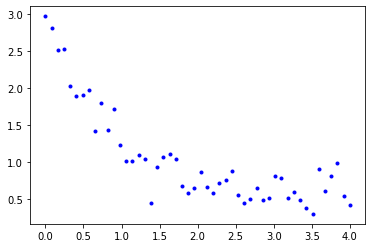

In [17]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5) #标准答案：a=2.5,b=1.3,c=0.5
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b.', label='data')

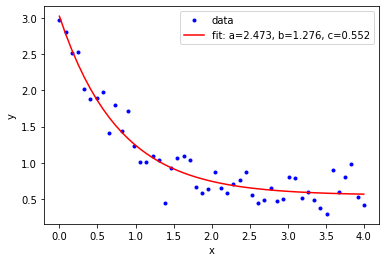

In [22]:
popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, ydata, 'b.', label='data')
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
# popt1, pcov1 = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
# plt.plot(xdata, func(xdata, *popt1), 'g--',
#          label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt1))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### 酶促反应: $u_i$是独立变量，$y_i$是测量结果。

$
f_i(x)=\cfrac {x_0(u_i^2+u_ix_1)}{u_i^2+u_ix_2+x_3}-y_i, i=0,1,...,10
$

In [3]:
from scipy.optimize import least_squares
def model(x, u):
    """原函数"""
    return x[0] * (u ** 2 + x[1] * u) / (u ** 2 + x[2] * u + x[3])
def fun(x, u, y):
    """残差"""
    return model(x, u) - y
def jac(x, u, y):
    """计算雅可比矩阵（求偏导）"""
    J = np.empty((u.size, x.size))
    den = u ** 2 + x[2] * u + x[3]
    num = u ** 2 + x[1] * u
    J[:, 0] = num / den
    J[:, 1] = x[0] * u / den
    J[:, 2] = -x[0] * num * u / den ** 2
    J[:, 3] = -x[0] * num / den ** 2
    return J

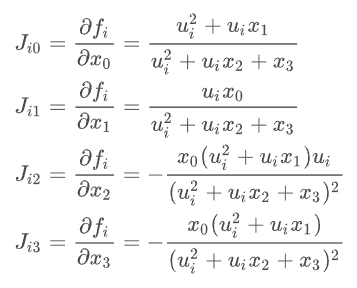

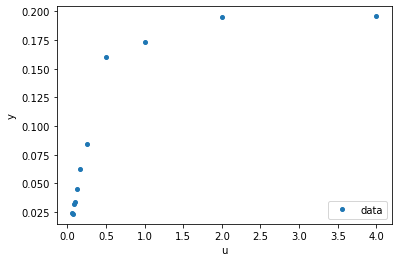

In [4]:
u = np.array([4.0, 2.0, 1.0, 5.0e-1, 2.5e-1, 1.67e-1, 1.25e-1, 1.0e-1,
              8.33e-2, 7.14e-2, 6.25e-2])
y = np.array([1.957e-1, 1.947e-1, 1.735e-1, 1.6e-1, 8.44e-2, 6.27e-2,
              4.56e-2, 3.42e-2, 3.23e-2, 2.35e-2, 2.46e-2])
plt.plot(u, y, 'o', markersize=4, label='data')
plt.xlabel("u")
plt.ylabel("y")
plt.legend(loc='lower right')
plt.show()

In [29]:
x0 = np.array([2.5, 3.9, 4.15, 3.9])
res = least_squares(fun, x0, jac=jac, bounds=(0, 100), args=(u, y), verbose=1)
print(res.x)
print(res)

`ftol` termination condition is satisfied.
Function evaluations 131, initial cost 4.4383e+00, final cost 1.5375e-04, first-order optimality 4.52e-08.
[0.192806   0.19130332 0.12306046 0.13607205]
 active_mask: array([0, 0, 0, 0])
        cost: 0.00015375280234150902
         fun: array([-1.30664586e-03, -1.87579954e-03,  8.91958340e-03, -1.11095297e-02,
        8.35200541e-03, -1.73677561e-04,  2.58387522e-05,  1.26262347e-03,
       -3.52355168e-03,  6.16759030e-04, -3.88872553e-03])
        grad: array([-4.52564596e-10, -1.44529677e-10,  1.55211427e-09,  8.54196274e-08])
         jac: array([[ 1.00823291,  0.04638017, -0.04676201, -0.0116905 ],
       [ 1.0000944 ,  0.08799521, -0.08800352, -0.04400176],
       [ 0.94613022,  0.15312606, -0.14487719, -0.14487719],
       [ 0.77222944,  0.21537647, -0.16632005, -0.33264011],
       [ 0.4810639 ,  0.21017745, -0.10110878, -0.40443513],
       [ 0.32429656,  0.17450668, -0.05659192, -0.33887375],
       [ 0.23664118,  0.14424711, -0.034

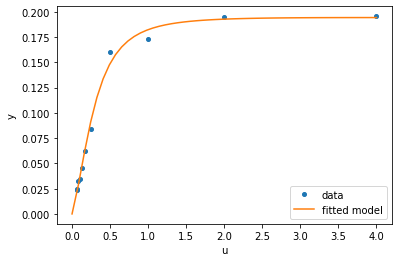

In [30]:
plt.plot(u, y, 'o', markersize=4, label='data')
u_test = np.linspace(0, 4)
y_test = model(res.x, u_test)
plt.plot(u_test, y_test, label='fitted model')
plt.xlabel("u")
plt.ylabel("y")
plt.legend(loc='lower right')
plt.show()

### 解非线性方程
$
x+cos(x)=0
$

In [11]:
from scipy.optimize import root
from math import cos

def eqn(x):
    return x + cos(x)

myroot = root(eqn, 0)
print(myroot.x)
print(myroot)

[-0.73908513]
    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.66786593e-13])
       r: array([-1.67361202])
  status: 1
 success: True
       x: array([-0.73908513])


### 求最小值:标量函数
$
y=x(x-2)(x+2)^2
$

1.280776401465682
     fun: -9.914949590828146
    nfev: 43
     nit: 38
 success: True
       x: 1.280776401465682


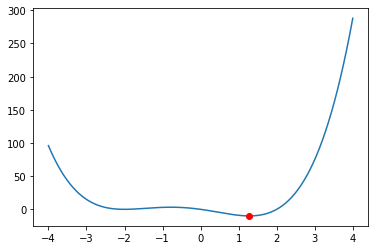

In [47]:
from scipy.optimize import minimize_scalar
x = np.linspace(-4, 4, 500)
def f(x):
    return (x - 2) * x * (x + 2)**2
res = minimize_scalar(f, method='golden')
plt.plot(x, f(x))
plt.plot(res.x, f(res.x), 'ro')

print(res.x)
print(res)
# res1 = minimize_scalar(f, bounds=(-3, -1), method='bounded')
# res1.x
# plt.plot(res1.x, f(res1.x), 'bo')
plt.show()

### 求最小值

Rosenbrock函数
$
f(x_1,x_2)=100(x_2-x_1^2)^2+(1-x_1)^2
$

In [51]:
from scipy.optimize import minimize
from scipy.optimize import rosen

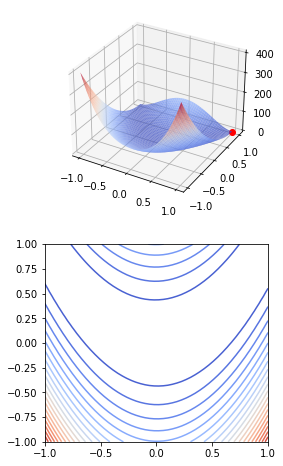

In [61]:
from matplotlib import cm
x = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(x, x)
Z = rosen([X, Y])
fig = plt.figure(figsize=plt.figaspect(2.))
# First subplot
ax = fig.add_subplot(2, 1, 1, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.7)
ax.plot(1,1,0, 'ro')
ax = fig.add_subplot(2, 1, 2)
ax.contour(X, Y, Z, 20, cmap=cm.coolwarm)
plt.show()

In [54]:
x0 = [1.3, 0.7, 0.8, 1.9, 1.2]
res = minimize(rosen, x0, method='BFGS')
res

      fun: 4.582238801147192e-11
 hess_inv: array([[0.00758471, 0.01243425, 0.02343139, 0.04612684, 0.09217081],
       [0.01243425, 0.0248114 , 0.04711885, 0.09295545, 0.1856203 ],
       [0.02343139, 0.04711885, 0.09454492, 0.18669172, 0.37268367],
       [0.04612684, 0.09295545, 0.18669172, 0.3736811 , 0.74586541],
       [0.09217081, 0.1856203 , 0.37268367, 0.74586541, 1.49365897]])
      jac: array([-5.78828406e-06, -2.82160702e-06, -2.79496036e-06, -7.64385124e-06,
        5.85386415e-06])
  message: 'Optimization terminated successfully.'
     nfev: 180
      nit: 25
     njev: 30
   status: 0
  success: True
        x: array([0.99999925, 0.99999852, 0.99999706, 0.99999416, 0.99998833])

### 求最小值练习
$
y={x_1^2\over 2}+{x_2^2\over 2}
$

In [6]:
from scipy.optimize import minimize


array([-1.07505143e-08, -1.07505143e-08])

### 应用案例
+ 血药浓度:用curvefit解决

$
c(t)=\cfrac {d}{V}e^{-kt}
$
, $d$为注入药物的剂量（已知），血液容积为$V$，排除速率（比例系数）为$k$。

In [62]:
# 血药浓度
time = np.array([0.25,0.5,1,1.5,2,3,4,6,8])
c = np.array([19.21,18.15,15.36,14.10,12.89,9.32,7.45,5.24,3.01])
df = pd.DataFrame(data=[time, c], index=['time', 'c'])
df

,0,1,2,3,4,5,6,7,8
time,0.25,0.50,1.00,1.5,2.00,3.00,4.00,6.00,8.00
c,19.21,18.15,15.36,14.1,12.89,9.32,7.45,5.24,3.01


In [63]:
from scipy.optimize import curve_fit


array([-0.24197011, 14.82116344])

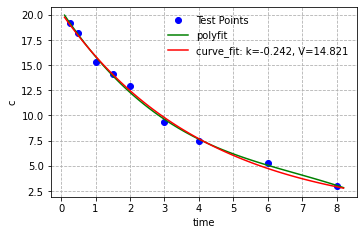

In [65]:
xp = np.linspace(0.1, 8.2, 100)


### 练习：
+ 读取csv数据，对人口增长数据做curve_fit拟合
    + 指数增长模型: $x(t)=x_0e^{rt}$
    + 阻滞增长模型：$x(t)=\cfrac{x_m}{1+\left(\cfrac{x_m}{x_0}-1\right)e^{-rt}} $
+ 对数函数上取10个点，用cuve_fit拟合，比较结果与精确值的差异

In [ ]:
# 人口增长
